In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.3            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.2.1              |       hd590300_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be 

In [3]:
# https://drive.google.com/file/d/14V6xb_wv9F2Nm4XSqQxCuZtDdmYT_Cge/view?usp=sharing
# https://drive.google.com/file/d/19juGcxAusUpX4Z62stexNLovoNrCWrb2/view?usp=sharing
# !gdown --id 14V6xb_wv9F2Nm4XSqQxCuZtDdmYT_Cge
!gdown --id 19juGcxAusUpX4Z62stexNLovoNrCWrb2

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19juGcxAusUpX4Z62stexNLovoNrCWrb2
From (redirected): https://drive.google.com/uc?id=19juGcxAusUpX4Z62stexNLovoNrCWrb2&confirm=t&uuid=d195b3d7-cf0c-4562-beb2-380eb00a9524
To: /kaggle/working/TomatoDataset.zip
100%|████████████████████████████████████████| 274M/274M [00:05<00:00, 47.4MB/s]


In [4]:
# unzipping the folder , the contents are placed in Data->output->/kaggle/working 
# Currently each user is limited to 20GB data in kaggle 
!unzip TomatoDataset.zip

Archive:  TomatoDataset.zip
   creating: TomatoDataset/test/
   creating: TomatoDataset/test/Tomato___Bacterial_spot/
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/022e8a4a-9297-4de3-88a5-ee7aa46dd526___UF.GRC_BS_Lab Leaf 8682.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/030501db-683b-4ed5-9ec0-c475a5dfdd76___GCREC_Bact.Sp 5650.JPG  
  inflating: TomatoDataset/test/

In [5]:
# # remove folder from current working directory kaggle
# ! rm -rf folder_val

# # remove files from current working directory kaggle
# ! rm folder.zip

In [6]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2   # L1 and L2 regularization for model regularization
from tensorflow.keras.models import Model,Sequential, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

2024-04-04 08:15:38.586018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 08:15:38.586147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 08:15:38.718078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
# import os
# os.environ['XLA_FLAGS'] = '--xla_disable_jit'

# import tensorflow as tf
# print(tf.__version__)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the preprocessing pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Generate augmented versions of the dataset
train_generator = datagen.flow_from_directory(
    '/kaggle/working/TomatoDataset/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    '/kaggle/working/TomatoDataset/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 11298 images belonging to 10 classes.
Found 4839 images belonging to 10 classes.


In [9]:
# # Print true labels and predicted labels
# for images, true_labels in validation_generator:
#     # Get predicted labels
#     pred_probs = model.predict(images)
#     pred_labels = pred_probs.argmax(axis=-1)
    
#     # Print true and predicted labels for this batch
#     print("True Labels:")
#     print(true_labels.argmax(axis=-1))
#     print("\nPredicted Labels:")
#     print(pred_labels)
#     break  # Only print for the first batch to avoid excessive output


# Extract true labels for validation data
y_val_true = []
for i in range(len(validation_generator)):
    y_val_true.extend(np.argmax(validation_generator[i][1], axis=1))

# # Print true labels
# print("True Labels:")
# print(y_true)


In [10]:
y_train_true = []
for i in range(len(train_generator)):
    y_train_true.extend(np.argmax(train_generator[i][1], axis=1))

In [11]:
# Extract true labels for validation data
y_val_true = []
for i in range(len(validation_generator)):
    y_val_true.extend(np.argmax(validation_generator[i][1], axis=1))

# # Print true labels
# print("True Labels:")
# print(y_true)

y_train_true = []
for i in range(len(train_generator)):
    y_train_true.extend(np.argmax(train_generator[i][1], axis=1))

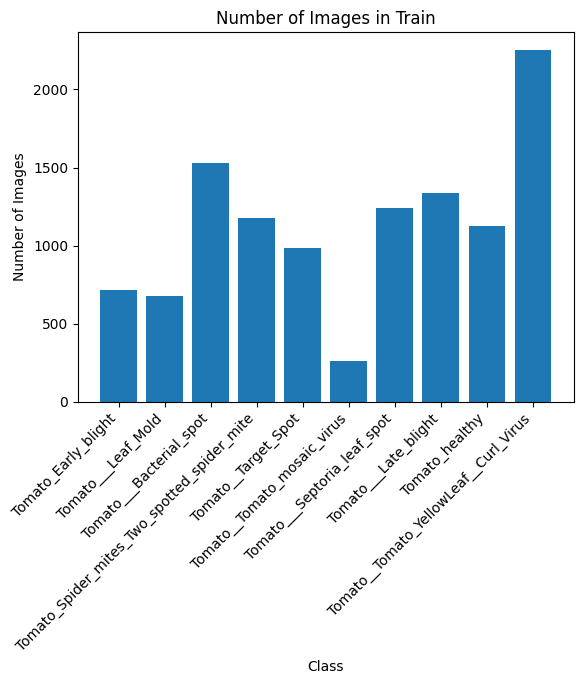

In [12]:
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
img_dir = '/kaggle/working/TomatoDataset/train'

# Get a list of all the subdirectories (which correspond to the classes)
class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

# Create a list to store the number of images in each class
class_counts = []

# Iterate over each class directory
for class_dir in class_dirs:
    # Get the path to the class directory
    class_path = os.path.join(img_dir, class_dir)
    
    # Get a list of all the image files in the class directory
    img_files = [f for f in os.listdir(class_path)]
    
    # Add the number of images to the class_counts list
    class_counts.append(len(img_files))

# Plot the class counts
plt.bar(class_dirs, class_counts)
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train')
plt.show()

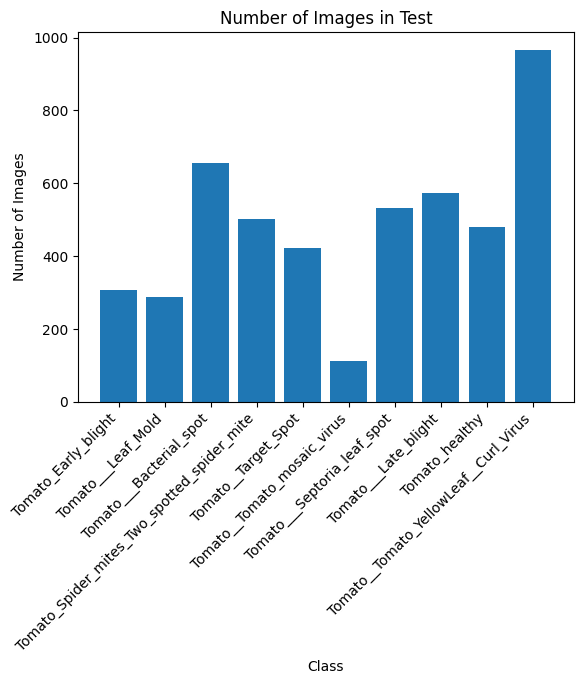

In [13]:
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
img_dir = '/kaggle/working/TomatoDataset/test'

# Get a list of all the subdirectories (which correspond to the classes)
class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

# Create a list to store the number of images in each class
class_counts = []

# Iterate over each class directory
for class_dir in class_dirs:
    # Get the path to the class directory
    class_path = os.path.join(img_dir, class_dir)
    
    # Get a list of all the image files in the class directory
    img_files = [f for f in os.listdir(class_path)]
    
    # Add the number of images to the class_counts list
    class_counts.append(len(img_files))

# Plot the class counts
plt.bar(class_dirs, class_counts)
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Number of Images in Test')
plt.show()

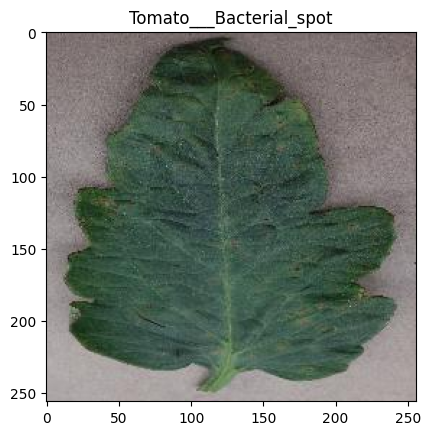

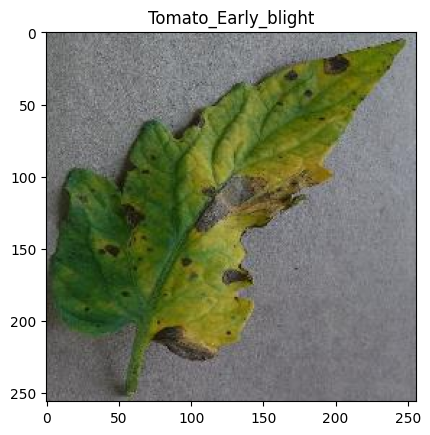

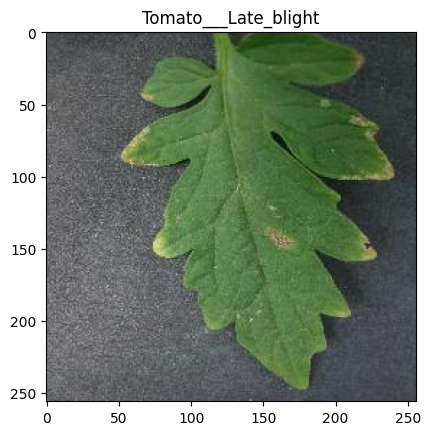

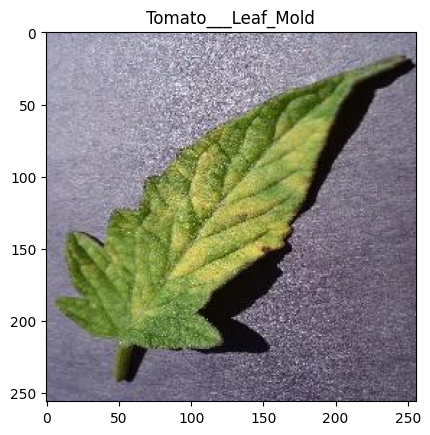

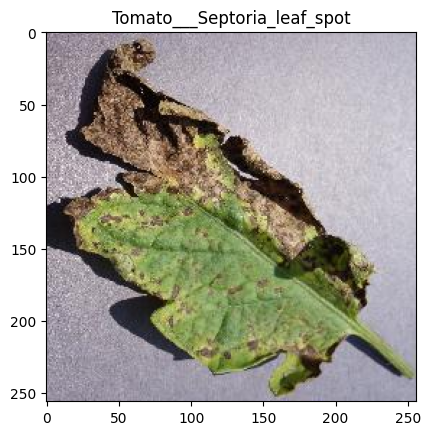

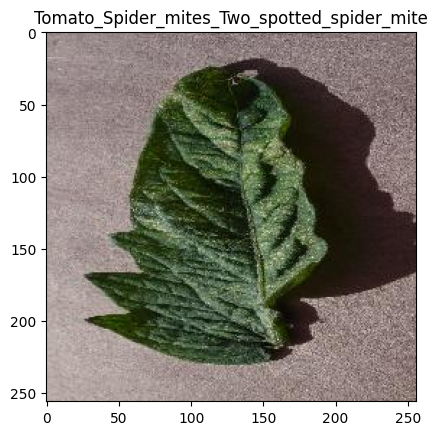

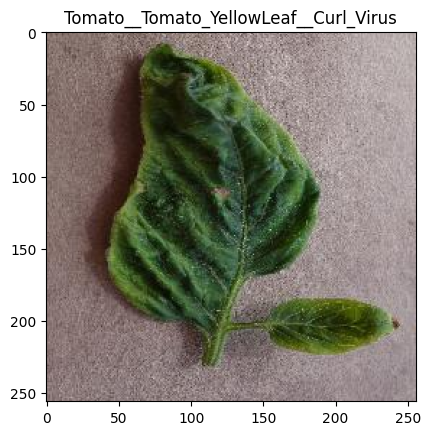

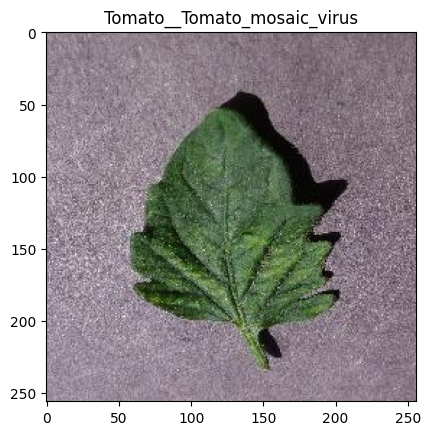

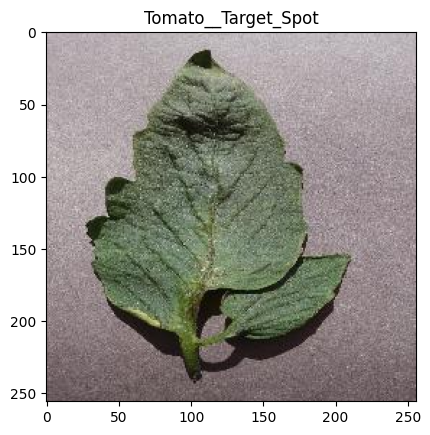

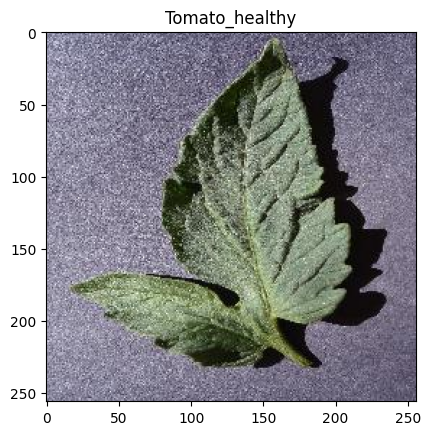

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset directory
dataset_dir = '/kaggle/working/TomatoDataset/train'

# Define the classes in the dataset
classes = ['Tomato___Bacterial_spot', 'Tomato_Early_blight', 'Tomato___Late_blight',
           'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
           'Tomato_Spider_mites_Two_spotted_spider_mite',
           'Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot', 'Tomato_healthy']

# Define the number of images to display for each class
num_images = 1

# Loop through each class
for class_ in classes:
    # Define the class directory
    class_dir = os.path.join(dataset_dir, class_)
    
    # Loop through each image in the class directory
    for i, filename in enumerate(os.listdir(class_dir)[:num_images]):
        # Construct the full path to the image file
        img_path = os.path.join(class_dir, filename)
        
        # Display the image
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(class_)
        plt.show()

In [15]:
# def exp_relu(x):
#     return tf.divide(1.0, tf.math.exp(tf.negative(x)))
# 1/e^x


# 1 - e^x
# def modified_relu(x):
#     return tf.where(x<0, 0.00001, x)

Leaky_relu

quantum_relu

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.applications import DenseNet201, DenseNet121
from keras import backend as K
import tensorflow as tf

from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D

# def qrelu(x):
#     return tf.keras.activations.relu(x, max_value=6)

def build_densenet():
    densenet = DenseNet201(weights='imagenet', include_top=False)

    input = Input(shape=(224,224,3))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = densenet(x)

    # Add a global average pooling layer
    x = GlobalAveragePooling2D()(x)

    # Add dense layers with 1024, 512, and 128 units and QReLU activation
    x = Dense(1024, activation='leaky_relu')(x) # qrelu
    x = Dropout(0.2)(x)
    x = Dense(512, activation='leaky_relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='leaky_relu')(x)
    x = Dropout(0.2)(x)

    # Multi-output layer
    output = Dense(10, activation='softmax', name='root')(x)

    # Create the model
    model = Model(input, output)

    return model


In [17]:
model = build_densenet()

model.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,880,926 (79.65 MB)

 Trainable params: 20,651,870 (78.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint

# Define the callback to save the best model based on validation accuracy
checkpoint_filepath = '/kaggle/working/best_model.weights.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')

In [20]:
# Train the model
# history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[EarlyStopping(patience=0)])
history = model.fit(train_generator, epochs=75, validation_data=validation_generator, 
                    callbacks=[checkpoint]) # 75 epochs0

Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-04 08:29:47.064859: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_one_step_on_data_128638__.90755] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-04-04 08:30:03.250593: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m16.185944543s

********************************
[Compiling module a_inference_one_step_on_data_128638__.90755] Very slow compile? If you want to file a bug, run with envvar XLA_FL

 48/177 ━━━━━━━━━━━━━━━━━━━━ 13:55 6s/step - accuracy: 0.4352 - loss: 1.7204  

W0000 00:00:1712219708.403049    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5992 - loss: 1.2263
Epoch 1: val_accuracy improved from -inf to 0.48088, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 952s 3s/step - accuracy: 0.5999 - loss: 1.2242 - val_accuracy: 0.4809 - val_loss: 4.3325
Epoch 2/75
 58/177 ━━━━━━━━━━━━━━━━━━━━ 1:45 889ms/step - accuracy: 0.8634 - loss: 0.4352

W0000 00:00:1712219995.507202    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 59/177 ━━━━━━━━━━━━━━━━━━━━ 1:44 885ms/step - accuracy: 0.8636 - loss: 0.4347

W0000 00:00:1712219996.343935    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.8788 - loss: 0.3906
Epoch 2: val_accuracy did not improve from 0.48088
177/177 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8789 - loss: 0.3903 - val_accuracy: 0.4038 - val_loss: 7.0040
Epoch 3/75
110/177 ━━━━━━━━━━━━━━━━━━━━ 56s 845ms/step - accuracy: 0.9075 - loss: 0.2858

W0000 00:00:1712220260.111670    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


111/177 ━━━━━━━━━━━━━━━━━━━━ 55s 843ms/step - accuracy: 0.9076 - loss: 0.2855

W0000 00:00:1712220260.942554    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.9132 - loss: 0.2714
Epoch 3: val_accuracy improved from 0.48088 to 0.62348, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9132 - loss: 0.2712 - val_accuracy: 0.6235 - val_loss: 2.4064
Epoch 4/75
  8/177 ━━━━━━━━━━━━━━━━━━━━ 2:28 881ms/step - accuracy: 0.9569 - loss: 0.1553

W0000 00:00:1712220396.025120    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


  9/177 ━━━━━━━━━━━━━━━━━━━━ 2:17 819ms/step - accuracy: 0.9558 - loss: 0.1624

W0000 00:00:1712220396.822436    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.9430 - loss: 0.1912
Epoch 4: val_accuracy improved from 0.62348 to 0.76503, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9431 - loss: 0.1911 - val_accuracy: 0.7650 - val_loss: 0.9655
Epoch 5/75
156/177 ━━━━━━━━━━━━━━━━━━━━ 18s 866ms/step - accuracy: 0.9495 - loss: 0.1656

W0000 00:00:1712220746.675817    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


157/177 ━━━━━━━━━━━━━━━━━━━━ 17s 865ms/step - accuracy: 0.9495 - loss: 0.1655

W0000 00:00:1712220747.551122    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.9498 - loss: 0.1646
Epoch 5: val_accuracy did not improve from 0.76503
177/177 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9498 - loss: 0.1646 - val_accuracy: 0.6993 - val_loss: 1.3526
Epoch 6/75
147/177 ━━━━━━━━━━━━━━━━━━━━ 26s 891ms/step - accuracy: 0.9560 - loss: 0.1432

W0000 00:00:1712220966.442725    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


148/177 ━━━━━━━━━━━━━━━━━━━━ 25s 890ms/step - accuracy: 0.9560 - loss: 0.1432

W0000 00:00:1712220967.291355    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.9558 - loss: 0.1436
Epoch 6: val_accuracy improved from 0.76503 to 0.80698, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9558 - loss: 0.1436 - val_accuracy: 0.8070 - val_loss: 1.0225
Epoch 7/75
150/177 ━━━━━━━━━━━━━━━━━━━━ 23s 884ms/step - accuracy: 0.9617 - loss: 0.1176

W0000 00:00:1712221196.767805    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


151/177 ━━━━━━━━━━━━━━━━━━━━ 22s 883ms/step - accuracy: 0.9617 - loss: 0.1176

W0000 00:00:1712221197.704749    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.9617 - loss: 0.1181
Epoch 7: val_accuracy improved from 0.80698 to 0.87766, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9617 - loss: 0.1181 - val_accuracy: 0.8777 - val_loss: 0.4286
Epoch 8/75
114/177 ━━━━━━━━━━━━━━━━━━━━ 55s 884ms/step - accuracy: 0.9707 - loss: 0.0897

W0000 00:00:1712221392.984195    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


115/177 ━━━━━━━━━━━━━━━━━━━━ 54s 882ms/step - accuracy: 0.9707 - loss: 0.0897

W0000 00:00:1712221393.843868    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.9698 - loss: 0.0936
Epoch 8: val_accuracy did not improve from 0.87766
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9698 - loss: 0.0937 - val_accuracy: 0.8173 - val_loss: 0.7673
Epoch 9/75
  4/177 ━━━━━━━━━━━━━━━━━━━━ 2:28 856ms/step - accuracy: 0.9844 - loss: 0.0559

W0000 00:00:1712221521.806245    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


  5/177 ━━━━━━━━━━━━━━━━━━━━ 2:20 815ms/step - accuracy: 0.9841 - loss: 0.0577

W0000 00:00:1712221522.682685    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.9739 - loss: 0.0880
Epoch 9: val_accuracy improved from 0.87766 to 0.92726, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9739 - loss: 0.0880 - val_accuracy: 0.9273 - val_loss: 0.3178
Epoch 10/75
151/177 ━━━━━━━━━━━━━━━━━━━━ 23s 886ms/step - accuracy: 0.9719 - loss: 0.1001

W0000 00:00:1712221882.673669    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


152/177 ━━━━━━━━━━━━━━━━━━━━ 22s 885ms/step - accuracy: 0.9719 - loss: 0.1001

W0000 00:00:1712221883.525777    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9717 - loss: 0.1003
Epoch 10: val_accuracy did not improve from 0.92726
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9717 - loss: 0.1003 - val_accuracy: 0.9198 - val_loss: 0.4123
Epoch 11/75
  3/177 ━━━━━━━━━━━━━━━━━━━━ 2:26 842ms/step - accuracy: 0.9653 - loss: 0.1445

W0000 00:00:1712221976.900306    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


  4/177 ━━━━━━━━━━━━━━━━━━━━ 2:17 796ms/step - accuracy: 0.9673 - loss: 0.1294

W0000 00:00:1712221977.829911    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9702 - loss: 0.0928
Epoch 11: val_accuracy improved from 0.92726 to 0.95702, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9702 - loss: 0.0928 - val_accuracy: 0.9570 - val_loss: 0.1586
Epoch 12/75
133/177 ━━━━━━━━━━━━━━━━━━━━ 38s 867ms/step - accuracy: 0.9737 - loss: 0.0961

W0000 00:00:1712222316.092583    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


134/177 ━━━━━━━━━━━━━━━━━━━━ 37s 865ms/step - accuracy: 0.9737 - loss: 0.0960

W0000 00:00:1712222316.987848    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.9738 - loss: 0.0946
Epoch 12: val_accuracy did not improve from 0.95702
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9738 - loss: 0.0946 - val_accuracy: 0.7375 - val_loss: 1.3599
Epoch 13/75
152/177 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 0.9742 - loss: 0.0848

W0000 00:00:1712222558.432590    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


153/177 ━━━━━━━━━━━━━━━━━━━━ 21s 883ms/step - accuracy: 0.9742 - loss: 0.0848

W0000 00:00:1712222559.200282    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9743 - loss: 0.0840
Epoch 13: val_accuracy did not improve from 0.95702
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9743 - loss: 0.0840 - val_accuracy: 0.7479 - val_loss: 1.5878
Epoch 14/75
155/177 ━━━━━━━━━━━━━━━━━━━━ 19s 866ms/step - accuracy: 0.9676 - loss: 0.0975

W0000 00:00:1712222783.583295    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


156/177 ━━━━━━━━━━━━━━━━━━━━ 18s 864ms/step - accuracy: 0.9676 - loss: 0.0975

W0000 00:00:1712222784.431944    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.9683 - loss: 0.0966
Epoch 14: val_accuracy did not improve from 0.95702
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9683 - loss: 0.0966 - val_accuracy: 0.8320 - val_loss: 0.9967
Epoch 15/75
 48/177 ━━━━━━━━━━━━━━━━━━━━ 1:54 889ms/step - accuracy: 0.9700 - loss: 0.0989

W0000 00:00:1712222915.638680    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 49/177 ━━━━━━━━━━━━━━━━━━━━ 1:53 885ms/step - accuracy: 0.9701 - loss: 0.0987

W0000 00:00:1712222916.510971    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9739 - loss: 0.0888
Epoch 15: val_accuracy did not improve from 0.95702
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9739 - loss: 0.0888 - val_accuracy: 0.9299 - val_loss: 0.3494
Epoch 16/75
157/177 ━━━━━━━━━━━━━━━━━━━━ 17s 880ms/step - accuracy: 0.9834 - loss: 0.0547

W0000 00:00:1712223236.727577    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


158/177 ━━━━━━━━━━━━━━━━━━━━ 16s 878ms/step - accuracy: 0.9834 - loss: 0.0547

W0000 00:00:1712223237.594681    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9834 - loss: 0.0549
Epoch 16: val_accuracy improved from 0.95702 to 0.96838, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9834 - loss: 0.0550 - val_accuracy: 0.9684 - val_loss: 0.1137
Epoch 17/75
 50/177 ━━━━━━━━━━━━━━━━━━━━ 1:52 888ms/step - accuracy: 0.9822 - loss: 0.0513

W0000 00:00:1712223370.906839    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 51/177 ━━━━━━━━━━━━━━━━━━━━ 1:50 878ms/step - accuracy: 0.9822 - loss: 0.0515

W0000 00:00:1712223371.685424    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9807 - loss: 0.0632
Epoch 17: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9807 - loss: 0.0632 - val_accuracy: 0.8322 - val_loss: 0.6554
Epoch 18/75
 86/177 ━━━━━━━━━━━━━━━━━━━━ 1:19 875ms/step - accuracy: 0.9805 - loss: 0.0696

W0000 00:00:1712223627.446207    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 87/177 ━━━━━━━━━━━━━━━━━━━━ 1:18 872ms/step - accuracy: 0.9805 - loss: 0.0695

W0000 00:00:1712223628.337680    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.9810 - loss: 0.0641
Epoch 18: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9810 - loss: 0.0641 - val_accuracy: 0.8132 - val_loss: 0.9336
Epoch 19/75
 16/177 ━━━━━━━━━━━━━━━━━━━━ 2:26 911ms/step - accuracy: 0.9729 - loss: 0.0844

W0000 00:00:1712223790.735194    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 17/177 ━━━━━━━━━━━━━━━━━━━━ 2:20 878ms/step - accuracy: 0.9733 - loss: 0.0834

W0000 00:00:1712223791.513877    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9810 - loss: 0.0632
Epoch 19: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9810 - loss: 0.0632 - val_accuracy: 0.9209 - val_loss: 0.4396
Epoch 20/75
153/177 ━━━━━━━━━━━━━━━━━━━━ 20s 865ms/step - accuracy: 0.9767 - loss: 0.0788

W0000 00:00:1712224133.777407    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


154/177 ━━━━━━━━━━━━━━━━━━━━ 19s 864ms/step - accuracy: 0.9767 - loss: 0.0787

W0000 00:00:1712224134.611042    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.9770 - loss: 0.0772
Epoch 20: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9770 - loss: 0.0771 - val_accuracy: 0.7814 - val_loss: 1.2506
Epoch 21/75
162/177 ━━━━━━━━━━━━━━━━━━━━ 13s 883ms/step - accuracy: 0.9751 - loss: 0.0816

W0000 00:00:1712224365.191934    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


163/177 ━━━━━━━━━━━━━━━━━━━━ 12s 882ms/step - accuracy: 0.9751 - loss: 0.0815

W0000 00:00:1712224366.077173    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9754 - loss: 0.0803
Epoch 21: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9754 - loss: 0.0803 - val_accuracy: 0.9151 - val_loss: 0.3163
Epoch 22/75
118/177 ━━━━━━━━━━━━━━━━━━━━ 51s 879ms/step - accuracy: 0.9832 - loss: 0.0527

W0000 00:00:1712224550.501736    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


119/177 ━━━━━━━━━━━━━━━━━━━━ 50s 878ms/step - accuracy: 0.9832 - loss: 0.0528

W0000 00:00:1712224551.567335    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.9823 - loss: 0.0587
Epoch 22: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9823 - loss: 0.0588 - val_accuracy: 0.9120 - val_loss: 0.3488
Epoch 23/75
132/177 ━━━━━━━━━━━━━━━━━━━━ 39s 877ms/step - accuracy: 0.9826 - loss: 0.0574

W0000 00:00:1712224787.127927    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


133/177 ━━━━━━━━━━━━━━━━━━━━ 38s 876ms/step - accuracy: 0.9826 - loss: 0.0574

W0000 00:00:1712224788.029812    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9825 - loss: 0.0583
Epoch 23: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9825 - loss: 0.0583 - val_accuracy: 0.9665 - val_loss: 0.1241
Epoch 24/75
 49/177 ━━━━━━━━━━━━━━━━━━━━ 1:51 868ms/step - accuracy: 0.9835 - loss: 0.0488

W0000 00:00:1712224939.472607    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 50/177 ━━━━━━━━━━━━━━━━━━━━ 1:49 865ms/step - accuracy: 0.9835 - loss: 0.0486

W0000 00:00:1712224940.309132    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.9844 - loss: 0.0450
Epoch 24: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9844 - loss: 0.0450 - val_accuracy: 0.6851 - val_loss: 2.1993
Epoch 25/75
117/177 ━━━━━━━━━━━━━━━━━━━━ 52s 875ms/step - accuracy: 0.9884 - loss: 0.0471

W0000 00:00:1712225221.281106    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


118/177 ━━━━━━━━━━━━━━━━━━━━ 51s 873ms/step - accuracy: 0.9884 - loss: 0.0471

W0000 00:00:1712225222.148875    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9880 - loss: 0.0465
Epoch 25: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9880 - loss: 0.0465 - val_accuracy: 0.9248 - val_loss: 0.2859
Epoch 26/75
107/177 ━━━━━━━━━━━━━━━━━━━━ 1:01 873ms/step - accuracy: 0.9905 - loss: 0.0300

W0000 00:00:1712225438.533520    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


108/177 ━━━━━━━━━━━━━━━━━━━━ 1:00 872ms/step - accuracy: 0.9904 - loss: 0.0301

W0000 00:00:1712225439.389425    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9882 - loss: 0.0378
Epoch 26: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9882 - loss: 0.0379 - val_accuracy: 0.7557 - val_loss: 1.3789
Epoch 27/75
 37/177 ━━━━━━━━━━━━━━━━━━━━ 2:00 859ms/step - accuracy: 0.9830 - loss: 0.0546

W0000 00:00:1712225600.683115    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 38/177 ━━━━━━━━━━━━━━━━━━━━ 1:58 854ms/step - accuracy: 0.9830 - loss: 0.0542

W0000 00:00:1712225601.535881    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.9852 - loss: 0.0472
Epoch 27: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9663 - val_loss: 0.1767
Epoch 28/75
144/177 ━━━━━━━━━━━━━━━━━━━━ 29s 882ms/step - accuracy: 0.9874 - loss: 0.0379

W0000 00:00:1712225921.060743    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


145/177 ━━━━━━━━━━━━━━━━━━━━ 28s 881ms/step - accuracy: 0.9874 - loss: 0.0379

W0000 00:00:1712225921.929215    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9877 - loss: 0.0376
Epoch 28: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9877 - loss: 0.0376 - val_accuracy: 0.8374 - val_loss: 0.7322
Epoch 29/75
148/177 ━━━━━━━━━━━━━━━━━━━━ 25s 884ms/step - accuracy: 0.9781 - loss: 0.0859

W0000 00:00:1712226150.098052    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


149/177 ━━━━━━━━━━━━━━━━━━━━ 24s 883ms/step - accuracy: 0.9781 - loss: 0.0858

W0000 00:00:1712226150.993428    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.9788 - loss: 0.0833
Epoch 29: val_accuracy did not improve from 0.96838
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9788 - loss: 0.0833 - val_accuracy: 0.9490 - val_loss: 0.2078
Epoch 30/75
 74/177 ━━━━━━━━━━━━━━━━━━━━ 1:31 884ms/step - accuracy: 0.9906 - loss: 0.0326

W0000 00:00:1712226310.446454    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 75/177 ━━━━━━━━━━━━━━━━━━━━ 1:29 882ms/step - accuracy: 0.9906 - loss: 0.0326

W0000 00:00:1712226311.528258    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.9894 - loss: 0.0341
Epoch 30: val_accuracy improved from 0.96838 to 0.98243, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9894 - loss: 0.0341 - val_accuracy: 0.9824 - val_loss: 0.0660
Epoch 31/75
106/177 ━━━━━━━━━━━━━━━━━━━━ 1:01 871ms/step - accuracy: 0.9884 - loss: 0.0444

W0000 00:00:1712226566.249972    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


107/177 ━━━━━━━━━━━━━━━━━━━━ 1:00 870ms/step - accuracy: 0.9884 - loss: 0.0444

W0000 00:00:1712226567.124518    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.9879 - loss: 0.0446
Epoch 31: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9879 - loss: 0.0446 - val_accuracy: 0.7119 - val_loss: 1.5274
Epoch 32/75
 37/177 ━━━━━━━━━━━━━━━━━━━━ 2:02 878ms/step - accuracy: 0.9714 - loss: 0.0982

W0000 00:00:1712226731.341510    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 38/177 ━━━━━━━━━━━━━━━━━━━━ 2:01 873ms/step - accuracy: 0.9716 - loss: 0.0978

W0000 00:00:1712226732.214797    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9794 - loss: 0.0726
Epoch 32: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9794 - loss: 0.0725 - val_accuracy: 0.9018 - val_loss: 0.4093
Epoch 33/75
  2/177 ━━━━━━━━━━━━━━━━━━━━ 2:27 841ms/step - accuracy: 0.9844 - loss: 0.0265

W0000 00:00:1712226925.767147    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


  3/177 ━━━━━━━━━━━━━━━━━━━━ 2:14 771ms/step - accuracy: 0.9834 - loss: 0.0343

W0000 00:00:1712226926.656665    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.8284 - loss: 1.5658
Epoch 33: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.8277 - loss: 1.5687 - val_accuracy: 0.1099 - val_loss: 18710.4746
Epoch 34/75
 98/177 ━━━━━━━━━━━━━━━━━━━━ 1:09 882ms/step - accuracy: 0.7708 - loss: 0.7750

W0000 00:00:1712227235.399664    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 99/177 ━━━━━━━━━━━━━━━━━━━━ 1:08 879ms/step - accuracy: 0.7711 - loss: 0.7736

W0000 00:00:1712227236.274732    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.7941 - loss: 0.6869
Epoch 34: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.7944 - loss: 0.6860 - val_accuracy: 0.8630 - val_loss: 0.6899
Epoch 35/75
 24/177 ━━━━━━━━━━━━━━━━━━━━ 2:15 885ms/step - accuracy: 0.8991 - loss: 0.3632

W0000 00:00:1712227396.548157    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 25/177 ━━━━━━━━━━━━━━━━━━━━ 2:13 876ms/step - accuracy: 0.8988 - loss: 0.3627

W0000 00:00:1712227397.411454    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.9018 - loss: 0.3183
Epoch 35: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9019 - loss: 0.3181 - val_accuracy: 0.8803 - val_loss: 1.7972
Epoch 36/75
 85/177 ━━━━━━━━━━━━━━━━━━━━ 1:21 891ms/step - accuracy: 0.9281 - loss: 0.2105

W0000 00:00:1712227675.786687    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 86/177 ━━━━━━━━━━━━━━━━━━━━ 1:21 890ms/step - accuracy: 0.9281 - loss: 0.2103

W0000 00:00:1712227676.690752    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9317 - loss: 0.1995
Epoch 36: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9317 - loss: 0.1994 - val_accuracy: 0.9496 - val_loss: 2.3274
Epoch 37/75
 26/177 ━━━━━━━━━━━━━━━━━━━━ 2:11 870ms/step - accuracy: 0.9428 - loss: 0.1996

W0000 00:00:1712227850.037289    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 27/177 ━━━━━━━━━━━━━━━━━━━━ 2:09 864ms/step - accuracy: 0.9431 - loss: 0.1989

W0000 00:00:1712227850.886507    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.9467 - loss: 0.1747
Epoch 37: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9467 - loss: 0.1747 - val_accuracy: 0.6634 - val_loss: 6999.6958
Epoch 38/75
 37/177 ━━━━━━━━━━━━━━━━━━━━ 2:03 880ms/step - accuracy: 0.9359 - loss: 0.2013

W0000 00:00:1712228085.253628    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 38/177 ━━━━━━━━━━━━━━━━━━━━ 2:01 874ms/step - accuracy: 0.9362 - loss: 0.2007

W0000 00:00:1712228086.134114    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.9465 - loss: 0.1673
Epoch 38: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9465 - loss: 0.1672 - val_accuracy: 0.9545 - val_loss: 0.1393
Epoch 39/75
131/177 ━━━━━━━━━━━━━━━━━━━━ 40s 891ms/step - accuracy: 0.9637 - loss: 0.1081

W0000 00:00:1712228395.694482    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


132/177 ━━━━━━━━━━━━━━━━━━━━ 39s 889ms/step - accuracy: 0.9637 - loss: 0.1082

W0000 00:00:1712228396.563788    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.9632 - loss: 0.1102
Epoch 39: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9632 - loss: 0.1102 - val_accuracy: 0.9614 - val_loss: 0.1232
Epoch 40/75
 30/177 ━━━━━━━━━━━━━━━━━━━━ 2:04 849ms/step - accuracy: 0.9537 - loss: 0.1524

W0000 00:00:1712228530.515512    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 31/177 ━━━━━━━━━━━━━━━━━━━━ 2:03 848ms/step - accuracy: 0.9539 - loss: 0.1518

W0000 00:00:1712228531.526261    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9609 - loss: 0.1216
Epoch 40: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9609 - loss: 0.1215 - val_accuracy: 0.9616 - val_loss: 0.1801
Epoch 41/75
117/177 ━━━━━━━━━━━━━━━━━━━━ 53s 895ms/step - accuracy: 0.9744 - loss: 0.0767

W0000 00:00:1712228835.772067    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


118/177 ━━━━━━━━━━━━━━━━━━━━ 52s 894ms/step - accuracy: 0.9743 - loss: 0.0768

W0000 00:00:1712228836.625049    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.9738 - loss: 0.0789
Epoch 41: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9738 - loss: 0.0789 - val_accuracy: 0.9576 - val_loss: 0.1444
Epoch 42/75
152/177 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 0.9770 - loss: 0.0719

W0000 00:00:1712229094.016551    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


153/177 ━━━━━━━━━━━━━━━━━━━━ 21s 885ms/step - accuracy: 0.9770 - loss: 0.0720

W0000 00:00:1712229094.908155    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.9764 - loss: 0.0732
Epoch 42: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9764 - loss: 0.0733 - val_accuracy: 0.9684 - val_loss: 0.1285
Epoch 43/75
  1/177 ━━━━━━━━━━━━━━━━━━━━ 19:46 7s/step - accuracy: 0.9706 - loss: 0.0791

W0000 00:00:1712229187.081524    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.9765 - loss: 0.0715
Epoch 43: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9765 - loss: 0.0715 - val_accuracy: 0.9746 - val_loss: 0.1121
Epoch 44/75
126/177 ━━━━━━━━━━━━━━━━━━━━ 45s 893ms/step - accuracy: 0.9780 - loss: 0.0719

W0000 00:00:1712229525.613649    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


127/177 ━━━━━━━━━━━━━━━━━━━━ 44s 891ms/step - accuracy: 0.9780 - loss: 0.0719

W0000 00:00:1712229526.448096    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.9778 - loss: 0.0705
Epoch 44: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9778 - loss: 0.0705 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 45/75
149/177 ━━━━━━━━━━━━━━━━━━━━ 24s 892ms/step - accuracy: 0.9798 - loss: 0.0612

W0000 00:00:1712229773.421140    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


150/177 ━━━━━━━━━━━━━━━━━━━━ 24s 890ms/step - accuracy: 0.9797 - loss: 0.0612

W0000 00:00:1712229774.310741    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.9794 - loss: 0.0629
Epoch 45: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9794 - loss: 0.0629 - val_accuracy: 0.9682 - val_loss: 0.1484
Epoch 46/75
125/177 ━━━━━━━━━━━━━━━━━━━━ 45s 884ms/step - accuracy: 0.9734 - loss: 0.0785

W0000 00:00:1712229978.223616    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


126/177 ━━━━━━━━━━━━━━━━━━━━ 44s 880ms/step - accuracy: 0.9735 - loss: 0.0784

W0000 00:00:1712229979.001957    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9747 - loss: 0.0753
Epoch 46: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9748 - loss: 0.0753 - val_accuracy: 0.9636 - val_loss: 0.1220
Epoch 47/75
124/177 ━━━━━━━━━━━━━━━━━━━━ 47s 894ms/step - accuracy: 0.9775 - loss: 0.0659

W0000 00:00:1712230204.013643    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


125/177 ━━━━━━━━━━━━━━━━━━━━ 46s 893ms/step - accuracy: 0.9776 - loss: 0.0659

W0000 00:00:1712230204.874265    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.9782 - loss: 0.0649
Epoch 47: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9782 - loss: 0.0649 - val_accuracy: 0.9661 - val_loss: 0.3380
Epoch 48/75
 69/177 ━━━━━━━━━━━━━━━━━━━━ 1:35 889ms/step - accuracy: 0.9842 - loss: 0.0581

W0000 00:00:1712230383.225852    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 70/177 ━━━━━━━━━━━━━━━━━━━━ 1:34 887ms/step - accuracy: 0.9842 - loss: 0.0581

W0000 00:00:1712230384.105917    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9837 - loss: 0.0573
Epoch 48: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9837 - loss: 0.0572 - val_accuracy: 0.9597 - val_loss: 0.1581
Epoch 49/75
 41/177 ━━━━━━━━━━━━━━━━━━━━ 1:59 877ms/step - accuracy: 0.9786 - loss: 0.0581

W0000 00:00:1712230582.538599    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 42/177 ━━━━━━━━━━━━━━━━━━━━ 1:57 872ms/step - accuracy: 0.9787 - loss: 0.0579

W0000 00:00:1712230583.421765    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.9830 - loss: 0.0514
Epoch 49: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9830 - loss: 0.0514 - val_accuracy: 0.9630 - val_loss: 0.5487
Epoch 50/75
146/177 ━━━━━━━━━━━━━━━━━━━━ 27s 880ms/step - accuracy: 0.9841 - loss: 0.0434

W0000 00:00:1712230901.360179    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


147/177 ━━━━━━━━━━━━━━━━━━━━ 26s 879ms/step - accuracy: 0.9841 - loss: 0.0434

W0000 00:00:1712230902.271650    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.9837 - loss: 0.0449
Epoch 50: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9837 - loss: 0.0450 - val_accuracy: 0.9570 - val_loss: 0.3445
Epoch 51/75
 52/177 ━━━━━━━━━━━━━━━━━━━━ 1:48 870ms/step - accuracy: 0.9829 - loss: 0.0545

W0000 00:00:1712231043.908265    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 53/177 ━━━━━━━━━━━━━━━━━━━━ 1:47 867ms/step - accuracy: 0.9829 - loss: 0.0545

W0000 00:00:1712231044.903676    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.9828 - loss: 0.0560
Epoch 51: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9828 - loss: 0.0560 - val_accuracy: 0.9806 - val_loss: 0.0777
Epoch 52/75
158/177 ━━━━━━━━━━━━━━━━━━━━ 16s 890ms/step - accuracy: 0.9849 - loss: 0.0417

W0000 00:00:1712231366.677039    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


159/177 ━━━━━━━━━━━━━━━━━━━━ 15s 889ms/step - accuracy: 0.9849 - loss: 0.0417

W0000 00:00:1712231367.552579    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.9849 - loss: 0.0416
Epoch 52: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9849 - loss: 0.0416 - val_accuracy: 0.9766 - val_loss: 0.0871
Epoch 53/75
130/177 ━━━━━━━━━━━━━━━━━━━━ 41s 885ms/step - accuracy: 0.9849 - loss: 0.0433

W0000 00:00:1712231567.609638    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


131/177 ━━━━━━━━━━━━━━━━━━━━ 40s 884ms/step - accuracy: 0.9848 - loss: 0.0434

W0000 00:00:1712231568.553993    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.9845 - loss: 0.0464
Epoch 53: val_accuracy did not improve from 0.98243
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9845 - loss: 0.0464 - val_accuracy: 0.9533 - val_loss: 0.1605
Epoch 54/75
132/177 ━━━━━━━━━━━━━━━━━━━━ 40s 906ms/step - accuracy: 0.9823 - loss: 0.0604

W0000 00:00:1712231801.023986    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


133/177 ━━━━━━━━━━━━━━━━━━━━ 39s 905ms/step - accuracy: 0.9823 - loss: 0.0604

W0000 00:00:1712231801.912902    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.9823 - loss: 0.0609
Epoch 54: val_accuracy improved from 0.98243 to 0.98677, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9823 - loss: 0.0609 - val_accuracy: 0.9868 - val_loss: 0.0425
Epoch 55/75
 67/177 ━━━━━━━━━━━━━━━━━━━━ 1:36 877ms/step - accuracy: 0.9884 - loss: 0.0344

W0000 00:00:1712231971.176542    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 68/177 ━━━━━━━━━━━━━━━━━━━━ 1:35 874ms/step - accuracy: 0.9884 - loss: 0.0345

W0000 00:00:1712231972.045413    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.9872 - loss: 0.0385
Epoch 55: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9872 - loss: 0.0385 - val_accuracy: 0.9744 - val_loss: 0.1357
Epoch 56/75
113/177 ━━━━━━━━━━━━━━━━━━━━ 58s 913ms/step - accuracy: 0.9861 - loss: 0.0475

W0000 00:00:1712232244.945306    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


114/177 ━━━━━━━━━━━━━━━━━━━━ 57s 912ms/step - accuracy: 0.9861 - loss: 0.0475

W0000 00:00:1712232245.837817    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 897ms/step - accuracy: 0.9856 - loss: 0.0474
Epoch 56: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9785 - val_loss: 0.0743
Epoch 57/75
 58/177 ━━━━━━━━━━━━━━━━━━━━ 1:46 898ms/step - accuracy: 0.9905 - loss: 0.0337

W0000 00:00:1712232425.486351    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 59/177 ━━━━━━━━━━━━━━━━━━━━ 1:45 894ms/step - accuracy: 0.9904 - loss: 0.0338

W0000 00:00:1712232426.386858    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9880 - loss: 0.0391
Epoch 57: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9880 - loss: 0.0391 - val_accuracy: 0.9570 - val_loss: 0.3215
Epoch 58/75
 96/177 ━━━━━━━━━━━━━━━━━━━━ 1:13 908ms/step - accuracy: 0.9804 - loss: 0.0639

W0000 00:00:1712232689.411307    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 97/177 ━━━━━━━━━━━━━━━━━━━━ 1:12 907ms/step - accuracy: 0.9804 - loss: 0.0638

W0000 00:00:1712232690.322652    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 897ms/step - accuracy: 0.9820 - loss: 0.0587
Epoch 58: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.9835 - val_loss: 0.0643
Epoch 59/75
106/177 ━━━━━━━━━━━━━━━━━━━━ 1:03 889ms/step - accuracy: 0.9901 - loss: 0.0332

W0000 00:00:1712232925.454357    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


107/177 ━━━━━━━━━━━━━━━━━━━━ 1:02 887ms/step - accuracy: 0.9901 - loss: 0.0332

W0000 00:00:1712232926.347940    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.9895 - loss: 0.0354
Epoch 59: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9895 - loss: 0.0354 - val_accuracy: 0.9740 - val_loss: 0.0944
Epoch 60/75
119/177 ━━━━━━━━━━━━━━━━━━━━ 52s 906ms/step - accuracy: 0.9890 - loss: 0.0357

W0000 00:00:1712233167.494663    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


120/177 ━━━━━━━━━━━━━━━━━━━━ 51s 904ms/step - accuracy: 0.9891 - loss: 0.0356

W0000 00:00:1712233168.407217    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9888 - loss: 0.0363
Epoch 60: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.7415 - val_loss: 1.7102
Epoch 61/75
 28/177 ━━━━━━━━━━━━━━━━━━━━ 2:07 857ms/step - accuracy: 0.9840 - loss: 0.0581

W0000 00:00:1712233310.889981    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 29/177 ━━━━━━━━━━━━━━━━━━━━ 2:06 852ms/step - accuracy: 0.9839 - loss: 0.0581

W0000 00:00:1712233311.744246    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9835 - loss: 0.0566
Epoch 61: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9835 - loss: 0.0566 - val_accuracy: 0.9676 - val_loss: 0.1397
Epoch 62/75
138/177 ━━━━━━━━━━━━━━━━━━━━ 35s 907ms/step - accuracy: 0.9864 - loss: 0.0452

W0000 00:00:1712233635.128321    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


139/177 ━━━━━━━━━━━━━━━━━━━━ 34s 906ms/step - accuracy: 0.9864 - loss: 0.0452

W0000 00:00:1712233636.039895    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.9863 - loss: 0.0447
Epoch 62: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9863 - loss: 0.0447 - val_accuracy: 0.9566 - val_loss: 0.2258
Epoch 63/75
 60/177 ━━━━━━━━━━━━━━━━━━━━ 1:44 894ms/step - accuracy: 0.9826 - loss: 0.0531

W0000 00:00:1712233793.593876    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 61/177 ━━━━━━━━━━━━━━━━━━━━ 1:42 886ms/step - accuracy: 0.9827 - loss: 0.0531

W0000 00:00:1712233794.350866    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.9844 - loss: 0.0491
Epoch 63: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.8500 - val_loss: 0.7062
Epoch 64/75
 50/177 ━━━━━━━━━━━━━━━━━━━━ 1:52 887ms/step - accuracy: 0.9892 - loss: 0.0390

W0000 00:00:1712234012.087298    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 51/177 ━━━━━━━━━━━━━━━━━━━━ 1:51 884ms/step - accuracy: 0.9892 - loss: 0.0390

W0000 00:00:1712234012.998564    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9893 - loss: 0.0373
Epoch 64: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9893 - loss: 0.0373 - val_accuracy: 0.8795 - val_loss: 0.4771
Epoch 65/75
 24/177 ━━━━━━━━━━━━━━━━━━━━ 2:15 887ms/step - accuracy: 0.9888 - loss: 0.0420

W0000 00:00:1712234219.455201    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 25/177 ━━━━━━━━━━━━━━━━━━━━ 2:13 881ms/step - accuracy: 0.9888 - loss: 0.0416

W0000 00:00:1712234220.375047    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.9887 - loss: 0.0362
Epoch 65: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9887 - loss: 0.0362 - val_accuracy: 0.9717 - val_loss: 0.0994
Epoch 66/75
 52/177 ━━━━━━━━━━━━━━━━━━━━ 1:49 875ms/step - accuracy: 0.9810 - loss: 0.0649

W0000 00:00:1712234471.400374    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 53/177 ━━━━━━━━━━━━━━━━━━━━ 1:48 872ms/step - accuracy: 0.9810 - loss: 0.0649

W0000 00:00:1712234472.295231    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9814 - loss: 0.0642
Epoch 66: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9814 - loss: 0.0642 - val_accuracy: 0.6638 - val_loss: 2.5471
Epoch 67/75
108/177 ━━━━━━━━━━━━━━━━━━━━ 1:03 916ms/step - accuracy: 0.9908 - loss: 0.0283

W0000 00:00:1712234755.745640    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


109/177 ━━━━━━━━━━━━━━━━━━━━ 1:02 913ms/step - accuracy: 0.9908 - loss: 0.0284

W0000 00:00:1712234756.665616    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.9902 - loss: 0.0306
Epoch 67: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9178 - val_loss: 0.3800
Epoch 68/75
149/177 ━━━━━━━━━━━━━━━━━━━━ 25s 896ms/step - accuracy: 0.9905 - loss: 0.0323

W0000 00:00:1712235022.568866    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


150/177 ━━━━━━━━━━━━━━━━━━━━ 24s 895ms/step - accuracy: 0.9905 - loss: 0.0323

W0000 00:00:1712235023.439027    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.9902 - loss: 0.0330
Epoch 68: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9585 - val_loss: 0.1617
Epoch 69/75
  3/177 ━━━━━━━━━━━━━━━━━━━━ 2:42 932ms/step - accuracy: 0.9852 - loss: 0.0210

W0000 00:00:1712235121.749800    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


  4/177 ━━━━━━━━━━━━━━━━━━━━ 2:11 758ms/step - accuracy: 0.9845 - loss: 0.0225

W0000 00:00:1712235122.673429    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.9863 - loss: 0.0427
Epoch 69: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9863 - loss: 0.0427 - val_accuracy: 0.9376 - val_loss: 0.2989
Epoch 70/75
 54/177 ━━━━━━━━━━━━━━━━━━━━ 1:50 902ms/step - accuracy: 0.9845 - loss: 0.0475

W0000 00:00:1712235400.923174    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 55/177 ━━━━━━━━━━━━━━━━━━━━ 1:49 898ms/step - accuracy: 0.9845 - loss: 0.0476

W0000 00:00:1712235401.810563    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - accuracy: 0.9851 - loss: 0.0460
Epoch 70: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9851 - loss: 0.0460 - val_accuracy: 0.9845 - val_loss: 0.0500
Epoch 71/75
 83/177 ━━━━━━━━━━━━━━━━━━━━ 1:26 921ms/step - accuracy: 0.9935 - loss: 0.0221

W0000 00:00:1712235661.337582    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 84/177 ━━━━━━━━━━━━━━━━━━━━ 1:25 921ms/step - accuracy: 0.9935 - loss: 0.0221

W0000 00:00:1712235662.225248    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.9925 - loss: 0.0275
Epoch 71: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.9925 - loss: 0.0276 - val_accuracy: 0.9415 - val_loss: 0.2440
Epoch 72/75
106/177 ━━━━━━━━━━━━━━━━━━━━ 1:04 906ms/step - accuracy: 0.9894 - loss: 0.0390

W0000 00:00:1712235915.475803    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


107/177 ━━━━━━━━━━━━━━━━━━━━ 1:03 904ms/step - accuracy: 0.9894 - loss: 0.0389

W0000 00:00:1712235916.484728    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9892 - loss: 0.0393
Epoch 72: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9892 - loss: 0.0394 - val_accuracy: 0.9539 - val_loss: 1.4586
Epoch 73/75
 83/177 ━━━━━━━━━━━━━━━━━━━━ 1:25 914ms/step - accuracy: 0.9874 - loss: 0.0514

W0000 00:00:1712236127.099350    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 84/177 ━━━━━━━━━━━━━━━━━━━━ 1:24 908ms/step - accuracy: 0.9875 - loss: 0.0513

W0000 00:00:1712236127.942854    5371 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.9888 - loss: 0.0434
Epoch 73: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9888 - loss: 0.0433 - val_accuracy: 0.9351 - val_loss: 0.2850
Epoch 74/75
 30/177 ━━━━━━━━━━━━━━━━━━━━ 2:10 885ms/step - accuracy: 0.9937 - loss: 0.0172

W0000 00:00:1712236309.777244    5373 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 31/177 ━━━━━━━━━━━━━━━━━━━━ 2:08 878ms/step - accuracy: 0.9937 - loss: 0.0173

W0000 00:00:1712236310.638130    5372 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.9927 - loss: 0.0212
Epoch 74: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9927 - loss: 0.0212 - val_accuracy: 0.9297 - val_loss: 0.3091
Epoch 75/75
 98/177 ━━━━━━━━━━━━━━━━━━━━ 1:11 903ms/step - accuracy: 0.9891 - loss: 0.0352

W0000 00:00:1712236599.838528    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


 99/177 ━━━━━━━━━━━━━━━━━━━━ 1:09 897ms/step - accuracy: 0.9891 - loss: 0.0352

W0000 00:00:1712236600.640187    5374 graph_launch.cc:161] Evict all gpu graphs from executor 0x5d211049e0d0


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.9895 - loss: 0.0338
Epoch 75: val_accuracy did not improve from 0.98677
177/177 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9370 - val_loss: 0.3809


quantum relu, leaky relu, modified relu, normal relu 
save each work

In [21]:
# model.save('/kaggle/working/my_model.keras')

In [22]:
# new_model = tf.keras.models.load_model('/kaggle/working/my_model.keras')

In [23]:
# final_loss, final_accuracy = model.evaluate(train_generator)
# print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

In [43]:
final_loss, final_accuracy = model.evaluate(validation_generator)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

76/76 ━━━━━━━━━━━━━━━━━━━━ 63s 829ms/step - accuracy: 0.9395 - loss: 0.3197
Final Loss: 0.3104134202003479, Final Accuracy: 0.9427567720413208


In [45]:
new_model = build_densenet()
new_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,880,926 (79.65 MB)

 Trainable params: 20,651,870 (78.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [46]:
new_model.load_weights(checkpoint_filepath)

classification report 

In [47]:
# Extract true labels for validation data
y_val_true = []
for i in range(len(validation_generator)):
    y_val_true.extend(np.argmax(validation_generator[i][1], axis=1))

# # Print true labels
# print("True Labels:")
# print(y_true)

y_train_true = []
for i in range(len(train_generator)):
    y_train_true.extend(np.argmax(train_generator[i][1], axis=1))

In [48]:
from sklearn.metrics import classification_report

# Assuming model.predict(validation_generator) gives the predicted labels
# y_true = validation_generator.classes
y_val_pred = new_model.predict(validation_generator).argmax(axis=1)

# Print y_true and y_pred
# print("True Labels:")
# print(y_true)
# print("\nPredicted Labels:")
# print(y_pred)

# Generate classification report
class_report_test = classification_report(y_val_true, y_val_pred)

# Print the report
print("\nClassification Report:")
print(class_report_test)

with open('/kaggle/working/classification_report_test.txt', 'w') as file:
    file.write(class_report_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       306
           1       1.00      0.97      0.98       503
           2       0.96      0.99      0.97       422
           3       1.00      1.00      1.00       966
           4       1.00      0.99      1.00       112
           5       0.99      0.99      0.99       656
           6       0.99      0.98      0.99       573
           7       1.00      0.98      0.99       289
           8       0.98      0.99      0.99       532
           9       0.99      1.00      0.99       480

    accuracy                           0.99      4839
   macro avg       0.99      0.99      0.99      4839
weighted avg       0.99      0.99      0.99      4839



In [49]:
from sklearn.metrics import classification_report

# Assuming model.predict(validation_generator) gives the predicted labels
# y_true = train_generator.classes
y_train_pred = new_model.predict(train_generator).argmax(axis=1)

# # Print y_true and y_pred
# print("True Labels:")
# print(y_true)
# print("\nPredicted Labels:")
# print(y_pred)

# Generate classification report
class_report_train = classification_report(y_train_true, y_train_pred)

# Print the report
print("\nClassification Report:")
print(class_report_train)

with open('/kaggle/working/classification_report_train.txt', 'w') as file:
    file.write(class_report_train)

177/177 ━━━━━━━━━━━━━━━━━━━━ 156s 880ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       716
           1       1.00      0.98      0.99      1174
           2       0.97      0.99      0.98       982
           3       1.00      1.00      1.00      2252
           4       0.99      1.00      1.00       261
           5       0.99      1.00      0.99      1531
           6       1.00      0.99      0.99      1337
           7       1.00      0.99      0.99       675
           8       0.99      1.00      0.99      1244
           9       0.99      1.00      0.99      1126

    accuracy                           0.99     11298
   macro avg       0.99      0.99      0.99     11298
weighted avg       0.99      0.99      0.99     11298



In [41]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_val_true, y_val_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=validation_generator.class_indices.keys(), 
#             yticklabels=validation_generator.class_indices.keys())
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# plt.savefig('/kaggle/working/confusion_matrix.png')

# image is not saving 

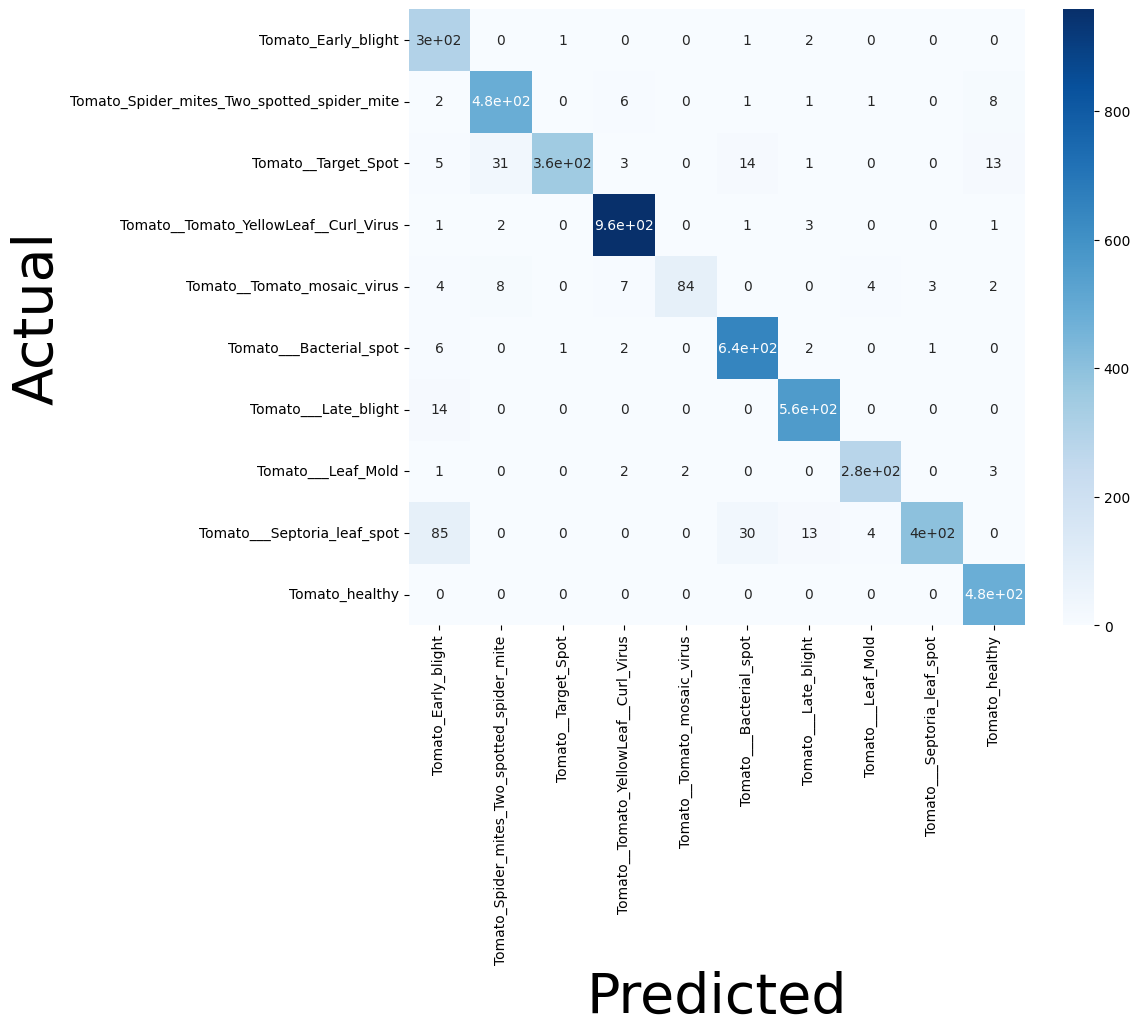

In [44]:
cm = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

plt.savefig('/kaggle/working/confusion_matrix_blue.png')

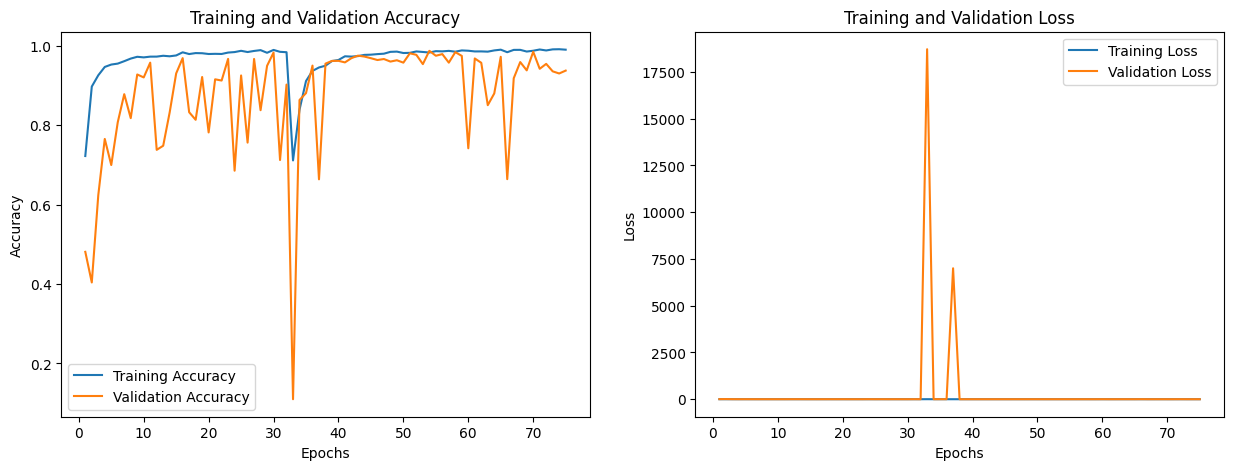

In [29]:
# history is model.fit , didnot store actually (here)
# Get the training and validation accuracy values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot
ax1.plot(epochs, acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot
ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.show()

In [52]:
# # accuracy plot 
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # loss plot
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [53]:
# new_model = build_densenet()
# new_model.summary()

In [55]:
# from keras.models import load_model

# new_model.load_weights(checkpoint_filepath)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Predicted class: Tomato_healthy
Root Cause: Healthy tomato plants without any visible diseases or pests
Fertilizer recommendation: No fertilizer recommendation needed.


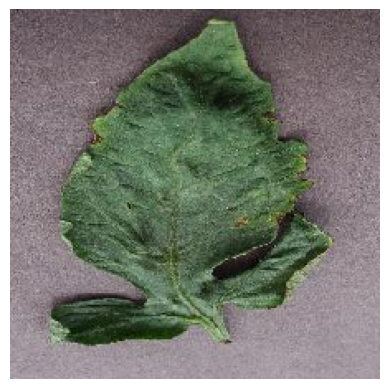

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of disease classes
disease_class = ['Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot',
                 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                 'Tomato_healthy']

# Load the image
image = tf.keras.preprocessing.image.load_img(
    # '/content/drive/MyDrive/Major Project/TomatoDataset/early_blight21-150x150.jpg', # - late blight(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/septoria spot leaf.jpeg', # - septoria(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/healthyy.jpeg', # - septoria(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/bacterial spot.jpg', # - leaf mold(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/healthy leaf da.jpeg', # - lateblight(same)
#     '/content/drive/MyDrive/Major Project/TomatoDataset/late_blight1-300x219.jpg', # - late blight(same)
#     '/kaggle/working/TomatoDataset/test/Tomato___Septoria_leaf_spot/edab479f-7af4-45ee-ac67-a5874a58ef52___Matt.S_CG 6803.JPG', #- septoria
#     '/kaggle/working/TomatoDataset/test/Tomato___Late_blight/eda41abe-61cf-439d-9562-e03fee3cd2ca___GHLB2 Leaf 8802.JPG', # - lateblight
#     '/kaggle/working/TomatoDataset/test/Tomato_Spider_mites_Two_spotted_spider_mite/f640c64b-1ab5-4c75-8b30-0d05834ad11b___Com.G_SpM_FL 1610.JPG', # - same 
#     '/kaggle/working/TomatoDataset/test/Tomato___Leaf_Mold/0de02a32-f166-4d67-bbb8-689e96d04c44___Crnl_L.Mold 8811.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_YellowLeaf__Curl_Virus/15cddf07-9796-455e-9ded-a84655b9828e___UF.GRC_YLCV_Lab 02296.JPG', #- same
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/a3f05d12-0e65-4f04-8f7d-5299124eb392___PSU_CG 2204.JPG', # - late blight ; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/1b9dc07a-40ab-45bc-a873-1ad4212e35a3___PSU_CG 2289.JPG', #- spidermites ; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/3ecbb7b8-ad66-4944-886e-de2ae2c2c35e___PSU_CG 2095.JPG', # - spidermites; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato_healthy/d835fbab-7301-4544-aba9-37cb5d25de9f___RS_HL 0506.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato_healthy/cc289e5c-7899-4081-9ea9-c3dc3ad3d2d4___GH_HL Leaf 408.1.JPG', # - same
#     '/kaggle/working/TomatoDataset/train/Tomato__Tomato_mosaic_virus/0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG', # - spidermites
    '/kaggle/working/TomatoDataset/test/Tomato__Target_Spot/03e3b044-d81f-49ca-a4d3-c6f7173b55a9___Com.G_TgS_FL 9921.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato___Bacterial_spot/cb4644f6-9f79-4cad-96e8-08da62d43550___GCREC_Bact.Sp 5732.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato_Early_blight/21ffaf6b-7ad0-45bf-bd7e-7d697413ebbd___RS_Erly.B 9500.JPG', # - same
    target_size=(224, 224)
)

# Preprocess the image
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Make a prediction
prediction = new_model.predict(tf.expand_dims(image, axis=0))

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Print the predicted class nameimport matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define the list of disease classes
disease_class = ['Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot',
                 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                 'Tomato_healthy']

# Load the image


# Preprocess the image

# Make a prediction


# Get the predicted class index


# Print the predicted class name
predicted_class = disease_class[predicted_class_index]
print("Predicted class:", predicted_class)



# Fertilizer recommendation dictionary
fertilizer_recommendation = {
    'Tomato_Early_blight': 'Use a balanced fertilizer with a ratio of 10-10-10.',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Use a fertilizer with a high nitrogen content.',
    'Tomato__Target_Spot': 'Use a fertilizer with a high phosphorus content.',
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 'Use a fertilizer with a high potassium content.',
    'Tomato__Tomato_mosaic_virus': 'Use a fertilizer with a high calcium content.',
    'Tomato_Bacterial_spot': 'Use a fertilizer with a high copper content.',
    'Tomato_Late_blight': 'Use a fertilizer with a high manganese content.',
    'Tomato_Leaf_Mold': 'Use a fertilizer with a high sulfur content.',
    'Tomato_Septoria_leaf_spot': 'Use a fertilizer with a high zinc content.',
    'Tomato_healthy': 'No fertilizer recommendation needed.'
}

root_cause = {
    'Tomato_Early_blight': 'Fungal infection caused by Alternaria solani fungus',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Infestation by Tetranychus urticae, commonly known as two-spotted spider mites',
    'Tomato__Target_Spot': 'Fungal infection caused by Corynespora cassiicola',
    'Tomato_YellowLeaf_Curl_Virus': 'Viral infection caused by Tomato yellow leaf curl virus (TYLCV)',
    'Tomato_mosaic_virus': 'Viral infection caused by Tomato mosaic virus (ToMV)',  
    # 'Tomato_Bacterial_spot': 'Bacterial infection caused by Xanthomonas campestris bacteria',
    'Tomato_Bacterial_spot': 'Bacterial infection caused by Xanthomonas perforans or Xanthomonas gardneri or Xanthomonas campestris bacteria',
    'Tomato_Leaf_Mold': 'Fungal infection caused by Passalora fulva (formerly Fulvia fulva)',
    'Tomato_Late_blight': 'Fungal infection caused by Phytophthora infestans',
    'Tomato_Septoria_leaf_spot': 'Fungal infection caused by Septoria lycopersici',
    'Tomato_healthy': 'Healthy tomato plants without any visible diseases or pests',
}

predicted_root_cause = root_cause[predicted_class]

# Get the fertilizer recommendation for the predicted class
fertilizer_recommendation_predicted = fertilizer_recommendation[predicted_class]

# Print the Root cause and fertilizer recommendation
print("Root Cause:", predicted_root_cause)

print("Fertilizer recommendation:", fertilizer_recommendation_predicted)


# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()